In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("OnionPrices2020.csv")
df

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0
...,...,...,...,...,...,...,...,...,...
107290,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,03/09/2020,2200,2300,2250.0
107291,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,04/09/2020,2050,2600,2200.0
107292,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,08/09/2020,2700,2875,2800.0
107293,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,09/09/2020,2625,2875,2800.0


In [2]:
print(df.isnull().sum())

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64


In [3]:
print("Number of Onion Markets:", len(df['market'].unique()))
print("Number of Districts:", len(df['district'].unique()))
print("Number of States:", len(df['state'].unique()))
print("Number of Varieties:", len(df['variety'].unique()))

Number of Onion Markets: 905
Number of Districts: 315
Number of States: 22
Number of Varieties: 21


In [4]:
min_price=list(df.min_price)
max_price =list(df.max_price)
model_price =list(df.modal_price)
arr =[list(df.state),list(df.market), list(df.variety)]
index =pd.MultiIndex.from_arrays(arr, names=('state','market','variety'))
onion_df = pd.DataFrame({'minimum_price':min_price,'maximum_price':max_price,'modal_price':model_price}, index=index)
onion_df.head()

minimum_price  maximum_price  modal_price
state          market  variety                                           
Andhra Pradesh Kurnool Local             1350           4390       3100.0
                       Local             1390           4400       3200.0
                       Local             1460           5150       4310.0
                       Local             2010           5200       4200.0
                       Local             1320           4050       3300.0

In [5]:
onion_df2=onion_df.groupby(level=2,sort=False).mean().reset_index()
onion_df2.head()

,variety,minimum_price,maximum_price,modal_price
0,Local,1434.796069,2080.043680,1765.918100
1,Other,1924.249870,2391.927237,2174.132516
2,Onion,1891.847403,2390.149402,2159.318046
3,Nasik,2072.626848,2389.244709,2242.755871
4,Red,1734.064353,1968.121026,1868.826279


In [6]:
print("national average modal price of onion:", round(onion_df2['modal_price'].mean()))

national average modal price of onion: 2327


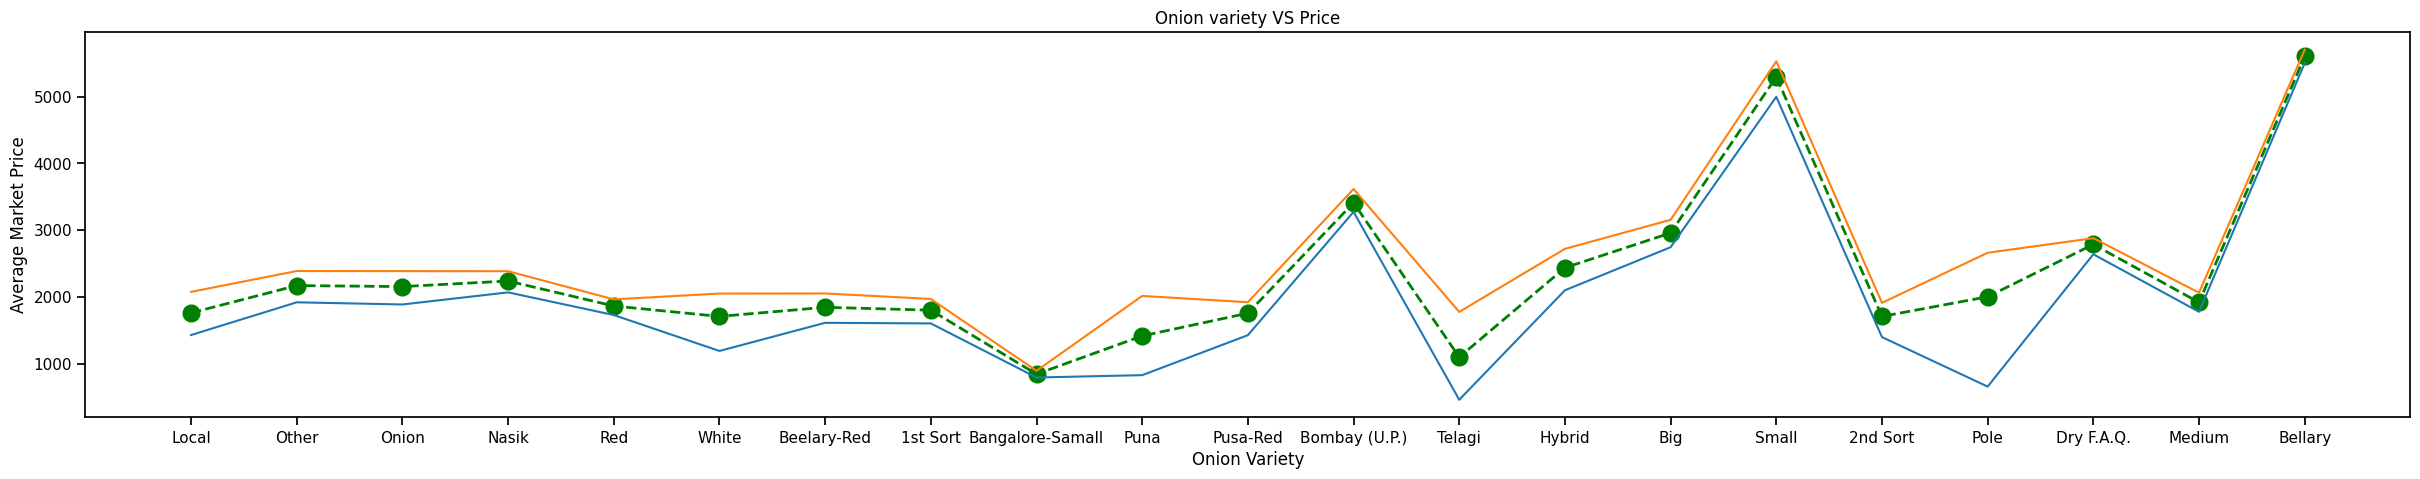

In [7]:
plt.figure(figsize=(30,5))
sns.set_context("notebook", font_scale=1)
plt.plot(onion_df2['variety'],onion_df2['modal_price'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(onion_df2['variety'],onion_df2['minimum_price'])
plt.plot(onion_df2['variety'],onion_df2['maximum_price'])
plt.title("Onion variety VS Price")
plt.xlabel("Onion Variety")
plt.ylabel("Average Market Price")
plt.show()

In [8]:
onion_df2[onion_df2['modal_price']>2327]

,variety,minimum_price,maximum_price,modal_price
11,Bombay (U.P.),3276.611607,3617.897321,3411.575893
13,Hybrid,2103.968254,2723.396825,2440.793651
14,Big,2747.691536,3157.188692,2961.016728
15,Small,4996.326297,5526.652593,5293.576598
18,Dry F.A.Q.,2642.408377,2883.246073,2790.052356
20,Bellary,5500.000000,5700.000000,5600.000000


In [9]:
onion_df2[onion_df2['modal_price']<2327].sort_values('modal_price',ascending=True)[0:5]

,variety,minimum_price,maximum_price,modal_price
8,Bangalore-Samall,800.000000,900.000000,850.000000
12,Telagi,467.391304,1780.704348,1104.086957
9,Puna,835.057471,2019.454023,1421.882184
16,2nd Sort,1403.947368,1915.789474,1713.157895
5,White,1196.816327,2054.902041,1713.387755


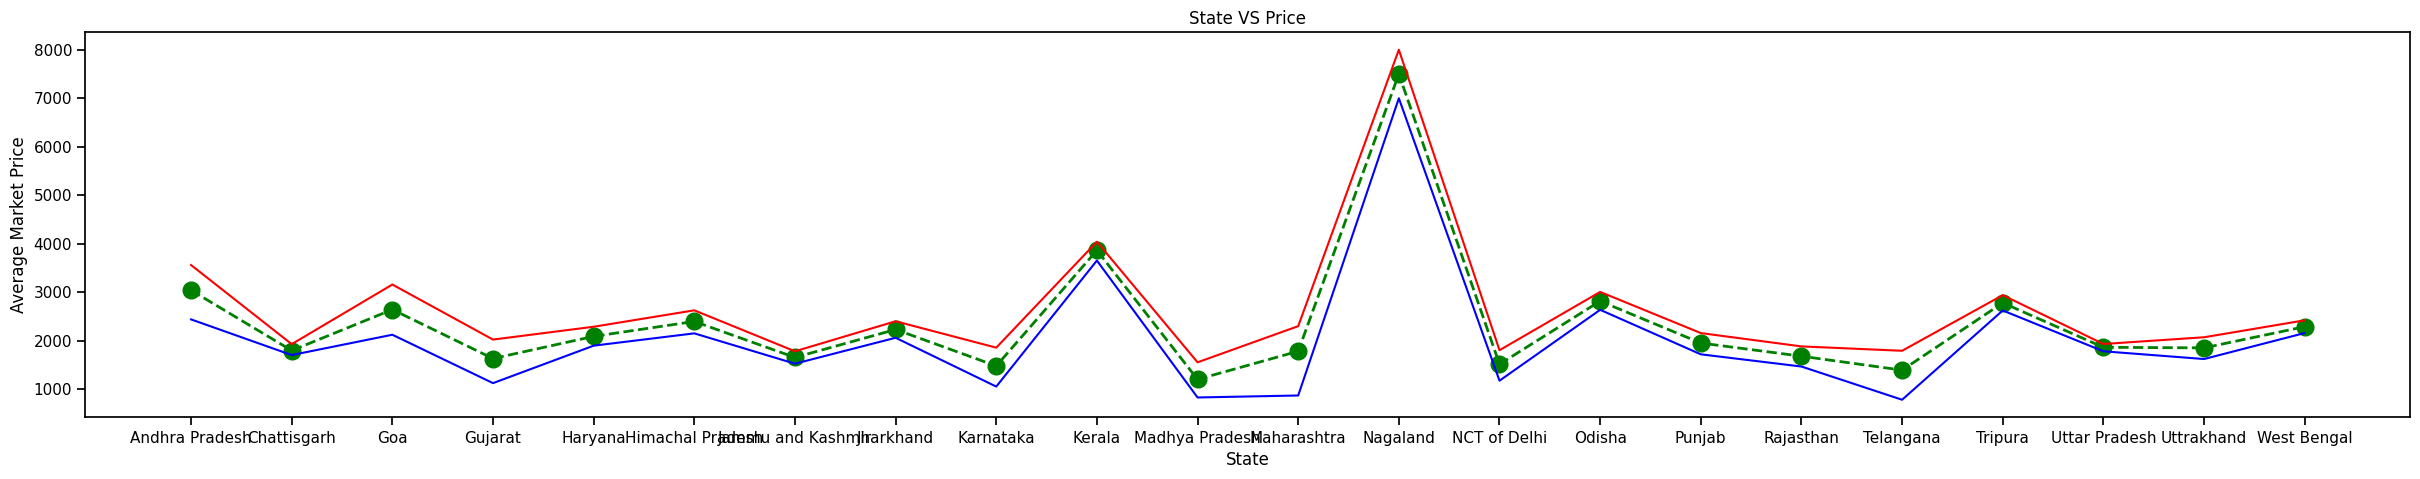

In [10]:
onion_df3=onion_df.groupby(level=0,sort=False).mean().reset_index()

plt.figure(figsize=(30,5))
sns.set_context("notebook", font_scale=1)
plt.plot(onion_df3['state'],onion_df3['modal_price'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(onion_df3['state'],onion_df3['minimum_price'],color="blue")
plt.plot(onion_df3['state'],onion_df3['maximum_price'],color="red")
plt.title("State VS Price")
plt.xlabel("State")
plt.ylabel("Average Market Price")
plt.show()

In [11]:
onion_df3.sort_values('modal_price',ascending=False)[0:5]

,state,minimum_price,maximum_price,modal_price
12,Nagaland,7000.000000,8000.000000,7500.000000
9,Kerala,3654.843559,4043.261829,3865.389291
0,Andhra Pradesh,2441.889764,3562.519685,3042.362205
14,Odisha,2639.384549,3008.402998,2819.208706
18,Tripura,2626.051661,2941.740467,2782.869004


In [12]:
onion_df3.sort_values('modal_price')[0:5]

,state,minimum_price,maximum_price,modal_price
10,Madhya Pradesh,832.536349,1557.417955,1205.648188
17,Telangana,785.733728,1795.224852,1396.303748
8,Karnataka,1057.226755,1859.320000,1481.995497
13,NCT of Delhi,1178.504043,1806.778976,1518.102426
3,Gujarat,1128.300680,2026.037755,1634.649830


In [13]:
print("Expensive onion producing states:",df[(df.variety=='Bellary')|(df.variety=='Small')|(df.variety=='Dry F.A.Q.')|(df.variety=='Big')|(df.variety=='Bombay (U.P.)')|(df.variety=='Hybrid')].state.unique())

Expensive onion producing states: ['Karnataka' 'Kerala' 'Maharashtra' 'Odisha' 'Tripura' 'Uttar Pradesh'
 'West Bengal']


In [14]:
print("Low cost onion producing states:",df[(df.variety=='Puna')|(df.variety=='2nd Sort')|(df.variety=='White')|(df.variety=='Telagi')|(df.variety=='Bangalore-Samall')].state.unique())

Low cost onion producing states: ['Gujarat' 'Karnataka' 'Maharashtra' 'Rajasthan']


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr3 = scaler.fit_transform(df[['modal_price','min_price','max_price']])

clusters = KMeans(5,random_state=42)# we've got k=5 using elbow plot
kmeans_model= clusters.fit(scaled_arr3)
df['cluster_id']= kmeans_model.labels_
onion_data1 = df.sort_values(['modal_price','cluster_id'])
onion_data1.head()

C:\Users\jetha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cluster_id
31624,Maharashtra,Ahmednagar,Shrigonda,Onion,Red,10/02/2020,20,54,20.0,2
30146,Madhya Pradesh,Sehore,Sehore,Onion,Other,18/01/2020,100,100,100.0,2
16954,Karnataka,Kolar,Kolar,Onion,Hybrid,29/04/2020,100,120,110.0,2
15079,Karnataka,Bellary,Bellary,Onion,Onion,04/04/2020,100,200,150.0,2
29431,Madhya Pradesh,Neemuch,Manasa,Onion,1st Sort,17/08/2020,100,280,190.0,2


In [16]:
onion_clusters = onion_data1.groupby('cluster_id')[['modal_price','min_price','max_price']].agg(['mean','std']).reset_index()
onion_clusters

cluster_id   modal_price                  min_price               \
                      mean          std          mean          std   
0          0   2297.929802   381.058109   2051.428491   472.951494   
1          1   5900.822674   863.231826   5605.879918   899.331111   
2          2   1168.392883   301.818259   1003.620090   335.608055   
3          3   3808.774251   506.823602   3492.634207   642.077371   
4          4  10878.770492  2072.688083  10380.147541  2005.758470   

      max_price               
           mean          std  
0   2504.212602   488.688693  
1   6178.523774   952.418815  
2   1303.324070   349.869073  
3   4078.847266   627.870206  
4  11271.874814  2207.936715

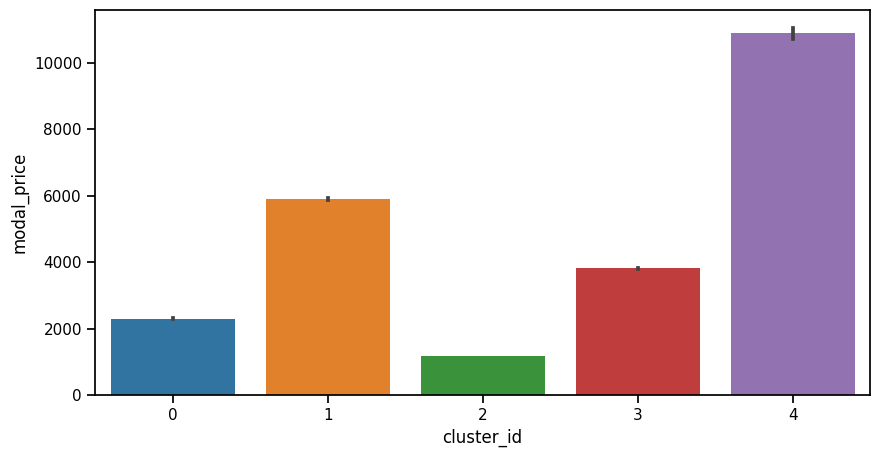

In [17]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
sns.barplot(x='cluster_id', y='modal_price', data=onion_data1)
plt.show()


